# Jimmy Liang
SJSU 001869817
###CMPE 258 - HW3 - Part B3 - Pytorch high level primitives
 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import torch
import torch.nn as nn

## Helper Classes

In [ ]:
# 3D plot function

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  x_2d = tsne.fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_2d[:, 0], x_2d[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x_2d[:, 0], x_2d[:, 1], y_pred, label='our function')
  plt.legend()

In [ ]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2

In [ ]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()


## Generate test data

x: (100, 3), weights1: (3, 1), bias1: (1,),   weights2: (3, 1), bias2: (1,), y1: (100, 1),   y2: (100, 1),y: (100, 2)


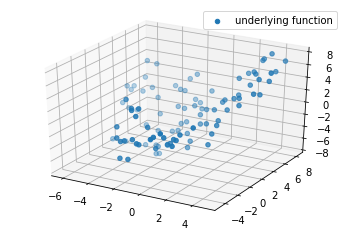

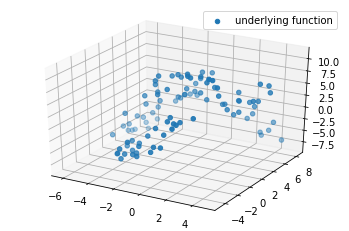

In [ ]:
n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights1_true = np.array([[3, -1, 5], ]).T
weights2_true = np.array([[1, 8, -3], ]).T
bias1_true = np.array([0.5])
bias2_true = np.array([1])

y1_true = x @ weights1_true + bias1_true
y2_true = x @ weights2_true + bias2_true
y_true = np.hstack((y1_true, y2_true))


print(f'x: {x.shape}, weights1: {weights1_true.shape}, bias1: {bias1_true.shape}, \
  weights2: {weights2_true.shape}, bias2: {bias2_true.shape}, y1: {y1_true.shape}, \
  y2: {y2_true.shape},y: {y_true.shape}')

plot_3d(x, y_true[:,0])
plot_3d(x, y_true[:,1])

## Run the model

tensor(17.4333, grad_fn=<MseLossBackward>)


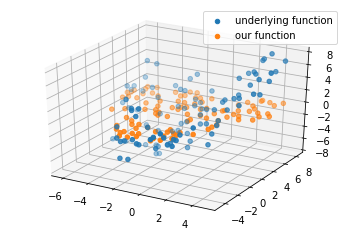

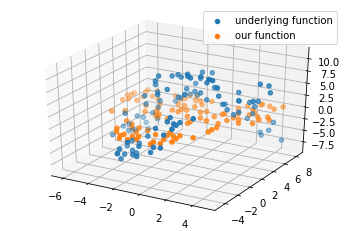

In [ ]:
loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x, y_true[:,0], model(x_tensor).detach()[:,0])
plot_3d(x, y_true[:,1], model(x_tensor).detach()[:,1])

Epoch 0, loss 17.433263778686523
Epoch 5, loss 13.014200210571289
Epoch 10, loss 5.634737491607666
Epoch 15, loss 1.4585074186325073
Epoch 20, loss 0.4440891146659851
Epoch 25, loss 0.2585769593715668
Epoch 30, loss 0.20263725519180298
Epoch 35, loss 0.16639278829097748


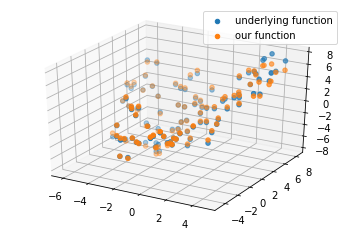

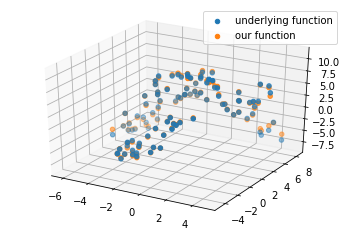

In [ ]:
# Run the training loop
torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true[:,0], model(x_tensor).detach()[:,0])
plot_3d(x, y_true[:,1], model(x_tensor).detach()[:,1])